### Installation

In [1]:
!pip install git+https://github.roche.com/harunr/shapml.git#egg=shapml

  Cloning https://github.roche.com/harunr/shapml.git to /private/var/folders/_2/db22rcws5d11jx72lkk5vfhh0000gn/T/pip-install-o55ihveh/shapml_db1560c9629e4367a3a0f431ffb8c868
  Running command git clone -q https://github.roche.com/harunr/shapml.git /private/var/folders/_2/db22rcws5d11jx72lkk5vfhh0000gn/T/pip-install-o55ihveh/shapml_db1560c9629e4367a3a0f431ffb8c868
  Resolved https://github.roche.com/harunr/shapml.git to commit bf5b6922c98cd2057848b501934e9dee4ac2f56c
  Using cached xgboost-1.3.3-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)


  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.0
    Uninstalling xgboost-1.5.0:
      Successfully uninstalled xgboost-1.5.0


### Initialization

In [1]:
import pandas as pd
import numpy as np
from shapml import binary_classification as BC
from shapml import regression as R
from shapml import survival_cox as S
from shapml import utils
%config Completer.use_jedi = False

Loading BokehJS ...

### Binart classification (BC) example : heart disease prediction

#### Dataset

In [2]:
pd.read_csv('data/heart_binary_classification.csv')

,age,sex,chest_pain,resting_bp,cholesterol,fasting_glucose,restecg,max_heart_rate,exercise_angina,exercise_ST_depression,exercise_ST_slope,number_of_major_vessels,thalassemia,heart_disease
0,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
2,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
3,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
4,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
299,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
300,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
301,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [3]:
heart_disease_BC = BC.xgb_shap(df=pd.read_csv('data/heart_binary_classification.csv'),
                                         target='heart_disease')
heart_disease_BC.tune_model()

100%|████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.35trial/s, best loss: 0.08354008488267384]
Done: took 14.970688104629517 seconds
The best hyperparameters are:  

{'eta': 0.7913918528789073, 'max_depth': 2, 'min_child_weight': 9.742168984981047, 'reg_alpha': 6.5483029116008895, 'reg_lambda': 5.3281666941454695, 'subsample': 0.9662924185014177, 'objective': 'binary:logistic', 'tree_method': 'exact', 'eval_metric': 'error'}


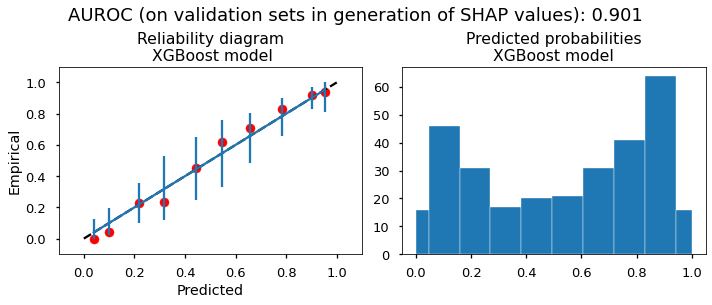

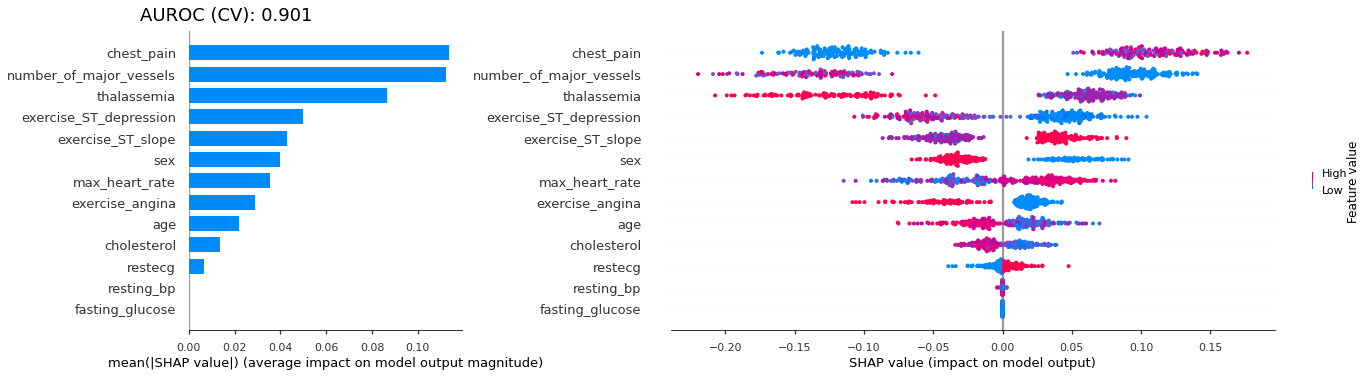

In [5]:
heart_disease_BC.plot_reliability_SHAP() # Performace using same CV as that for genrated SHAP value estiamtes
heart_disease_BC.shap_summary_plots(figsize=(30, 5))

### Functional relationships of covariates with outcome (with confidence intervals)

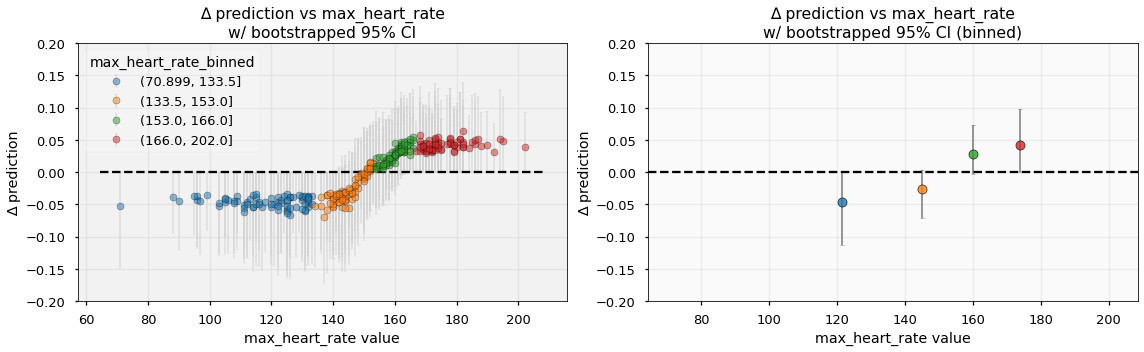

In [16]:
heart_disease_BC.plot_bootstrapped_feature_dependence('max_heart_rate',nQuantiles=4, ylims=[-.2, .2]);

No bootstrap_summaryDF was found. To customize the summary further run self.generate_bootstrap_summaryDF(summary_params) with defined summary parameters.
For now, genrating figure using summary_params= {'chest_pain': {'nQuantiles': 4}, 'number_of_major_vessels': {'nQuantiles': 4}, 'thalassemia': {'nQuantiles': 4}, 'exercise_ST_depression': {'nQuantiles': 4}, 'exercise_ST_slope': {'nQuantiles': 4}}
Adding chest_pain
Running bootstrap analysis using sample_with_replacement



   Execution time: 46.46s
Adding number_of_major_vessels
Adding thalassemia
Adding exercise_ST_depression
Setting lowest bin = 0.0
Adding exercise_ST_slope
Saved self.bootstrap_summaryDF. To remove it, del self.bootstrap_summaryDF
Saved self.summary_params. To remove it, del self.bootstrap_summaryDF


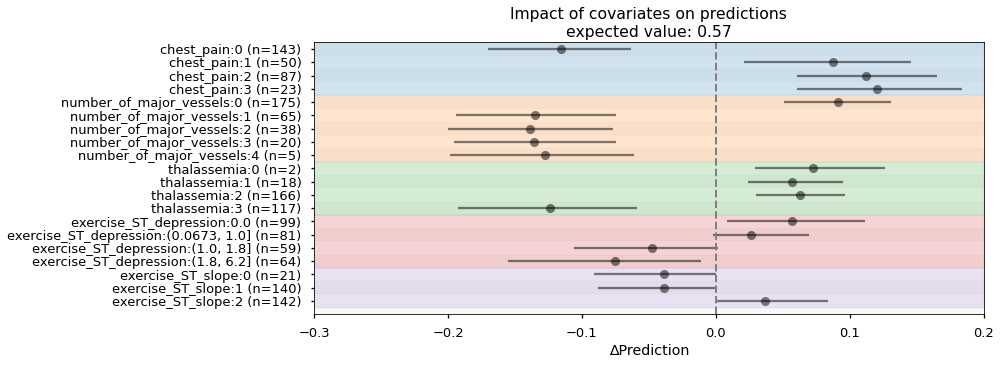

In [15]:
heart_disease_BC.plot_bootstrap_summary_table(n_features=5, figsize=(12,5));

### Interactive GUI
* Currently supports binart classification well, but we are actively developing the interactive GUI for regression and survival analyses

In [17]:
heart_disease_BC.interact()

Deleting: models_d from SHAP_outputs
Deleting: explainer_d from SHAP_outputs
Deleting: explainer_logit_d from SHAP_outputs
Saved as:  ./heart_disease_streamlit.p

		To share the app, navigate to the working directory and run: 
		rsconnect deploy streamlit --server https://connect.apollo.roche.com/ --api-key <YOUR_API_KEY (32 characters)> ./
		


AssertionError: 

# Run regression analysis
TODO: supply an actual regression dataset (Right now, I'm just predicting the binary target using a regression model.) 

In [2]:
r_analysis = R.xgb_shap(df=pd.read_csv('data/2014_life_expectancy_data_regression.csv'), 
                        target='Life expectancy', max_evals=5, bootstrap_iterations=100, n_folds_SHAP=10, verbose=False)
r_analysis.tune_model()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Encoding categorical columns in order of prevalance:  ['Country', 'Status']
{'Country': {1: nan, 0: None}, 'Status': {1: 'Developing', 2: 'Developed', 0: None}}
100%|██████████| 5/5 [00:03<00:00,  1.59trial/s, best loss: 3.223020137700089]
Done: took 3.1518588066101074 seconds
The best hyperparameters are:  

{'eta': 0.04886155882402443, 'max_depth': 4, 'min_child_weight': 0.23426893630461354, 'reg_alpha': 0.7018622048844911, 'reg_lambda': 0.005574148490637361, 'subsample': 0.9078955536113863, 'objective': 'reg:squarederror', 'tree_method': 'exact', 'eval_metric': 'error'}


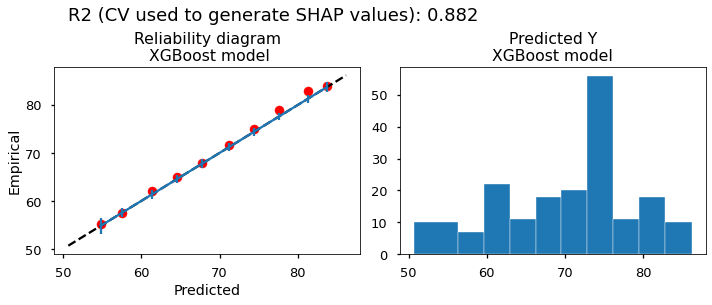

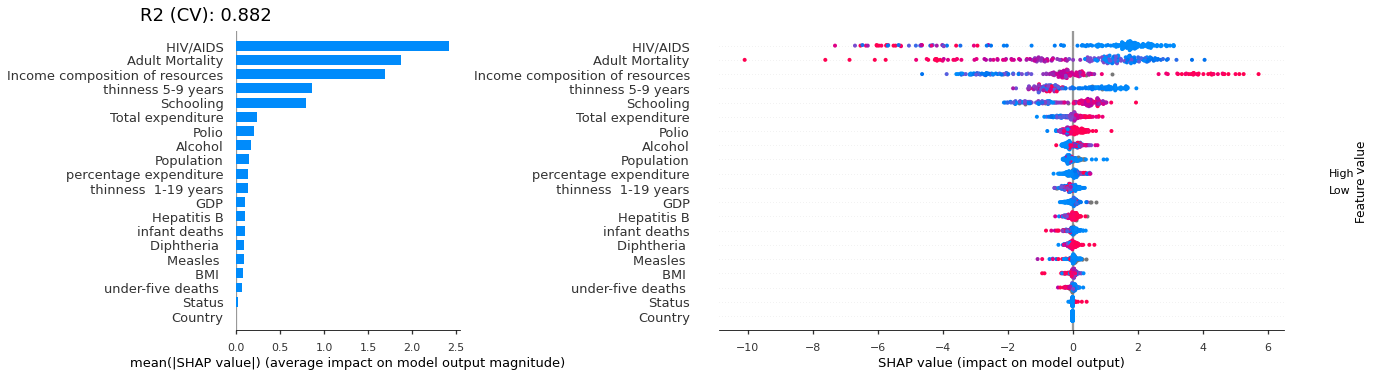

In [4]:
r_analysis.plot_reliability_SHAP()
r_analysis.shap_summary_plots(figsize=(30, 5))

Genrating figure using cached bootstrap_summaryDF


<AxesSubplot:title={'center':'Impact of covariates on predictions\nexpected value: 71.03'}, xlabel='∆Prediction'>

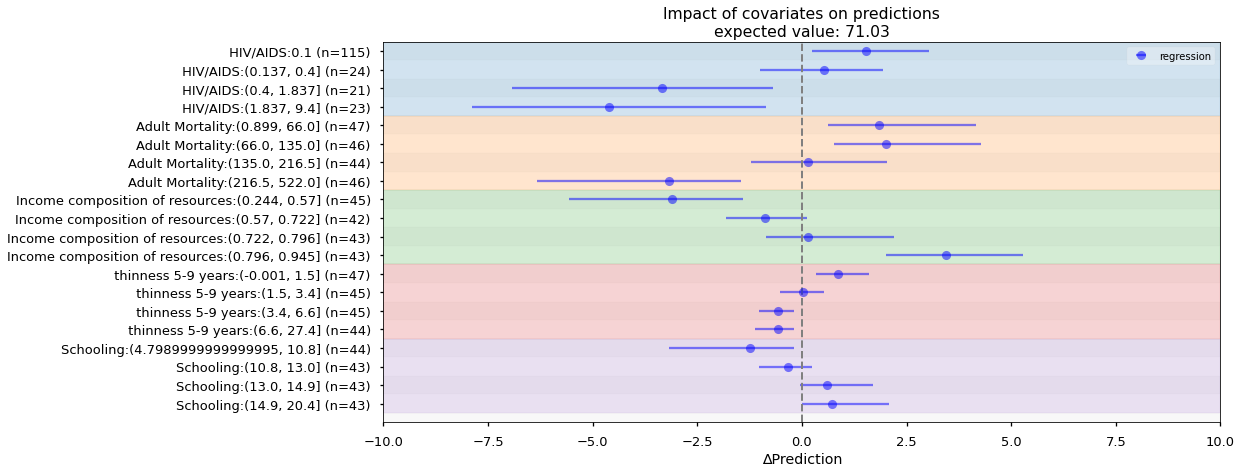

In [9]:
r_analysis.plot_bootstrap_summary_table(label='regression', color='b', xlims=[-10,10], figsize=(15,7))

In [11]:
r_analysis.bootstrap_summaryDF

,Variable,Value,median feature val,∆Prediction,mean ∆Prediction,0.025,0.975,N,Life expectancy,mean Life expectancy
0,HIV/AIDS,0.1,0.100,"1.528 (0.236, 3.040)",1.528153,0.236084,3.039982,115,76.282±0.000,76.281739
1,HIV/AIDS,"(0.137, 0.4]",0.300,"0.523 (-1.007, 1.941)",0.522526,-1.007419,1.941071,24,69.662±0.000,69.662500
2,HIV/AIDS,"(0.4, 1.837]",0.800,"-3.349 (-6.919, -0.701)",-3.348756,-6.918904,-0.701208,21,61.590±0.000,61.590476
3,HIV/AIDS,"(1.837, 9.4]",3.500,"-4.613 (-7.874, -0.865)",-4.613491,-7.874337,-0.864549,23,58.848±0.000,58.847826
4,Adult Mortality,"(0.899, 66.0]",23.000,"1.845 (0.612, 4.149)",1.844575,0.611925,4.149129,47,75.709±0.000,75.708511
5,Adult Mortality,"(66.0, 135.0]",98.000,"2.001 (0.777, 4.282)",2.001379,0.776579,4.282367,46,78.004±0.000,78.004348
6,Adult Mortality,"(135.0, 216.5]",162.000,"0.148 (-1.214, 2.027)",0.148109,-1.214371,2.026614,44,71.636±0.000,71.636364
7,Adult Mortality,"(216.5, 522.0]",273.500,"-3.178 (-6.328, -1.458)",-3.177645,-6.328154,-1.458355,46,60.711±0.000,60.710870
8,Income composition of resources,"(0.244, 0.57]",0.485,"-3.116 (-5.558, -1.409)",-3.115746,-5.557747,-1.409313,45,61.207±0.000,61.206667
9,Income composition of resources,"(0.57, 0.722]",0.659,"-0.871 (-1.816, 0.117)",-0.871339,-1.815994,0.116782,42,70.119±0.000,70.119048
